In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata

In [2]:
ls

aclim_era5_sfc_1981_2010.ctl
aclim_era5_sfc_1981_2010_flament-et-al-2013_1d.nc
aclim_era5_sfc_1981_2010.grd
aclim_era5_sfc_1981_2010_kaban-et-al-2003.nc
aclim_era5_sfc_1981_2010_modified.ctl
aclim_era5_sfc_1981_2010_modified.ctl~
aclim_era5_sfc_1981_2010_modified_orography.nc
aclim_era5_sfc_1981_2010.nc
aclim_era5_sfc_1981_2010_panasyuk-hager-2000.nc
aclim_era5_sfc_1981_2010_steinberger-2007.nc
annual_precip_anomaly_FLA.png
annual_precip_anomaly_KAB.png
annual_precip_anomaly_RHO.png
annual_precip_anomaly_STE.png
annual_precip_CTL.png
annual_precip_FLA.png
annual_precip_KAB.png
annual_precip_RHO.png
annual_precip_STE.png
dynamic_topography_forcing.ipynb
dynamic_with_shallow_structure_spot.dat
dynamic_with_shallow_structure_spot_shiptrack.dat
dyn_top_map_flament-et-al-2013_1d.png
dyn_top_mapflament-et-al-2013_1d.png
dyn_top_map_kaban-et-al-2003.png
dyn_top_mapkaban-et-al-2003.png
dyn_top_map_panasyuk-hager-2000.png
dyn_top_mappanasyuk-hager-2000.png
dyn_top_map_steinberger-2007.png
dyn_t

In [3]:
df = pd.read_csv('with_shallow_structure_full.dat', sep='\s+')
df

,lat,lon,value_km,sigma_km
0,-20.252196,-56.623942,0.307887,0.00001
1,-25.691729,-55.592827,-0.593464,0.00001
2,-26.174347,-55.739337,-0.575905,0.00001
3,-26.656893,-55.887038,-0.524814,0.00001
4,-26.821464,-56.489351,-0.488151,0.00001
...,...,...,...,...
163837,6.547685,-145.310438,1.087601,0.00001
163838,4.544496,-146.589301,1.316379,0.00001
163839,7.677854,-145.302347,1.132517,0.00001
163840,7.110494,-145.306969,1.111616,0.00001


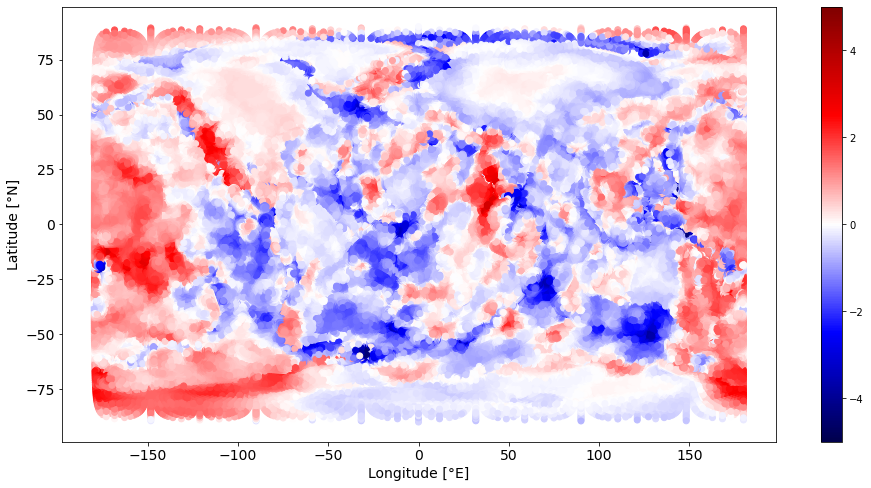

In [4]:
fig = plt.figure(figsize=(16,8))
sc = plt.scatter(df.lon,df.lat,c=df.value_km,cmap='seismic',vmin=-5,vmax=5)
plt.colorbar(sc)
plt.ylabel('Latitude [°N]',fontsize=14)
plt.xlabel('Longitude [°E]',fontsize=14)
plt.tick_params(axis='both',labelsize=14)

plt.savefig('dyn_with_shallow_structure_full_scatter_data.png')

In [5]:
# Try to interpolate the data on a regular grid of 0.25°

grid_x, grid_y = np.mgrid[-180:180:0.25, -90:90:0.25]
grid_x

array([[-180.  , -180.  , -180.  , ..., -180.  , -180.  , -180.  ],
       [-179.75, -179.75, -179.75, ..., -179.75, -179.75, -179.75],
       [-179.5 , -179.5 , -179.5 , ..., -179.5 , -179.5 , -179.5 ],
       ...,
       [ 179.25,  179.25,  179.25, ...,  179.25,  179.25,  179.25],
       [ 179.5 ,  179.5 ,  179.5 , ...,  179.5 ,  179.5 ,  179.5 ],
       [ 179.75,  179.75,  179.75, ...,  179.75,  179.75,  179.75]])

In [6]:
interp_dyn_top = griddata((df.lon,df.lat),df.value_km,(grid_x, grid_y), method='linear')

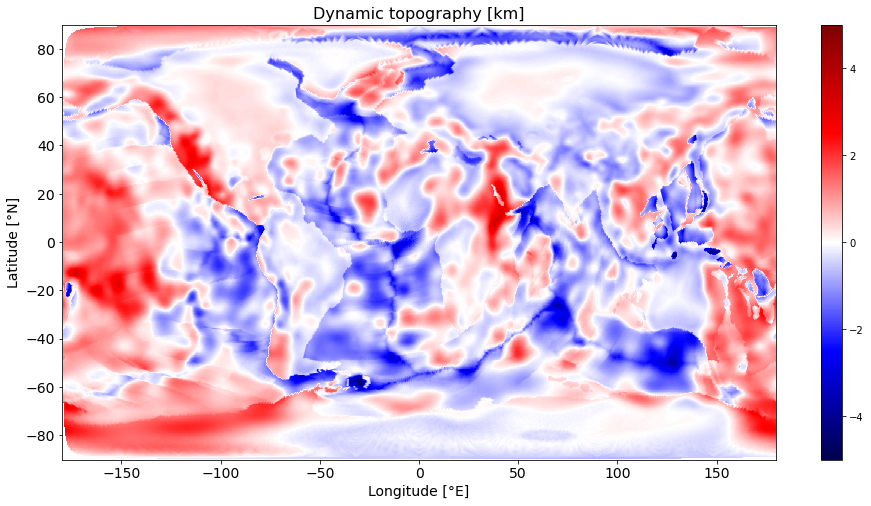

In [7]:
fig = plt.figure(figsize=(16,8))
sc = plt.pcolormesh(grid_x,grid_y,interp_dyn_top,cmap='seismic',vmin=-5,vmax=5,shading='nearest')
plt.colorbar(sc)
plt.ylabel('Latitude [°N]',fontsize=14)
plt.xlabel('Longitude [°E]',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.title('Dynamic topography [km]',fontsize=16)

plt.savefig('dyn_with_shallow_structure_full.png')

In [20]:
def nan_gaussian_filter(field,sigma):
    """
    Function to smooth the field ignoring the NaNs.
    I follow the first answer here 
    https://stackoverflow.com/questions/18697532/gaussian-filtering-a-image-with-nan-in-python
    By default, the filter is truncated at 4 sigmas.
    """
    from scipy.ndimage import gaussian_filter
    
    field = np.double(field)
    
    # Take the original field and replace the NaNs with zeros.
    field0 = field.copy()
    field0[np.isnan(field)] = 0
    ff = gaussian_filter(field0, sigma=sigma)
    
    # Create the smoothed weight field.
    weight = 0*field.copy()+1
    weight[np.isnan(field)] = 0
    ww = gaussian_filter(weight, sigma=sigma)
    
    zz = ff/(ww*weight) # This rescale for the actual weights used in the filter and set to NaN where the field
                        # was originally NaN.
    return zz


In [ ]:
# Let's try to filter this figure with a low-pass filter.

lp_interp_dyn_top = nan_gaussian_filter(interp_dyn_top,40) # we filter with a sigma of 10 degrees

fig = plt.figure(figsize=(16,8))
sc = plt.pcolormesh(grid_x,grid_y,lp_interp_dyn_top,cmap='seismic',vmin=-2,vmax=2,shading='nearest')
plt.colorbar(sc)
plt.ylabel('Latitude [°N]',fontsize=14)
plt.xlabel('Longitude [°E]',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.title('Dynamic topography [km]',fontsize=16)

plt.savefig('dyn_with_shallow_structure_full_filtered.png')

In [ ]:
# Now read the file that Pietro modified (20241017) - the file is the same as before...
df = pd.read_csv('with_shallow_structure_full_PSsmoothing.dat', sep='\s+')
df

In [ ]:
# Interpolate and plot
grid_x, grid_y = np.mgrid[-180:180:0.25, -90:90:0.25]
grid_x

interp_dyn_top = griddata((df.lon,df.lat),df.value_km,(grid_x, grid_y), method='linear')

fig = plt.figure(figsize=(16,8))
sc = plt.pcolormesh(grid_x,grid_y,interp_dyn_top,cmap='seismic',vmin=-2,vmax=2,shading='nearest')
plt.colorbar(sc)
plt.ylabel('Latitude [°N]',fontsize=14)
plt.xlabel('Longitude [°E]',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.title('Dynamic topography [km]',fontsize=16)

#plt.savefig('dyn_with_shallow_structure_full.png')

In [ ]:
# Read the SPEEDY orography file.
# It is the aclim_era5_sfc_1981_2010.grd file. I edit its ctl file to remove the line 
# EDEF       1  NAMES  1,
# because it is not recognized by cdo. Then, as it seems that the data are in the first time stamp only, 
# even though the file has 12 time steps I modify the 
# TDEF      12  LINEAR    jan1981     1mo
# line replacing the 12 with 1.
# I also remove the YREV keyword.

# I convert the file with 
# cdo -v -f nc import_binary aclim_era5_sfc_1981_2010_modified.ctl aclim_era5_sfc_1981_2010.nc

orogr_filename = 'aclim_era5_sfc_1981_2010.nc'
ds_or = xr.open_dataset(orogr_filename)
ds_or

In [ ]:
ds_or.orog.plot()

In [ ]:
# Interpolate the dynamical topography on the SPEEDY grid.
slon = ds_or.lon.values
slat = ds_or.lat.values
grid_x, grid_y = np.meshgrid(slon,slat)

# Change negative df.lon with df.lon+360
lon360 = df.lon
lon360[df.lon<0] = df.lon+360

a_interp_dyn_top = griddata((lon360,df.lat),df.value_km,(grid_x, grid_y), method='linear')
interp_dyn_top = np.flipud(a_interp_dyn_top) # This is to flip upside down the 

In [ ]:
fig = plt.figure(figsize=(16,8))
sc = plt.pcolormesh(grid_x,grid_y,interp_dyn_top,cmap='seismic',vmin=-2,vmax=2,shading='nearest')
plt.colorbar(sc)
plt.ylabel('Latitude [°N]',fontsize=14)
plt.xlabel('Longitude [°E]',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.title('Dynamic topography [km]',fontsize=16)

#plt.savefig('dyn_with_shallow_structure_full.png')

In [ ]:
# Take the difference between the SPEEDY orography and the dynamic component.
modif_or = ds_or.orog - interp_dyn_top*1000 # [m]
modif_or = xr.where(modif_or>0,modif_or.values,0)

# Reverse the y axis
#modif_or_yrev = np.flipud(modif_or[0,0].values)

modif_or.plot(vmin=-5000,vmax=5000,cmap='seismic')

In [ ]:
# Replace the orography with the modified orography in the dataset and save it to a new netcdf file.

ds_or['orog'] = modif_or
ds_or.fillna(-999)
ds_or.to_netcdf('aclim_era5_sfc_1981_2010_modified_orography.nc')

# Now this needs to be converted in binary format with grads and then the ctl file of the original file can be used.

Text(0.5, 0, 'latitude')

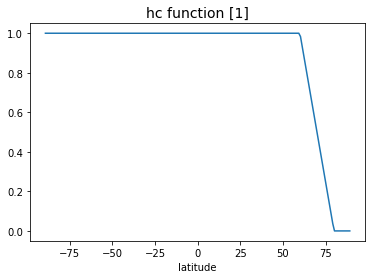

In [92]:
# Define an elevation cap field that is equal to one for lat<60, zero for lat>80 and linearly connects 
# one and zero in between. Note that the latitude values are the true ones, then the function needs to be flipped
# upside down for the speedy convention!

hc = np.ones_like(slat)*np.heaviside(60-slat,0)+(1-1/20*(slat-60))*np.heaviside(slat-60,0)*np.heaviside(80-slat,0)
plt.plot(slat,hc)
plt.title('hc function [1]',fontsize=14)
plt.xlabel('latitude')

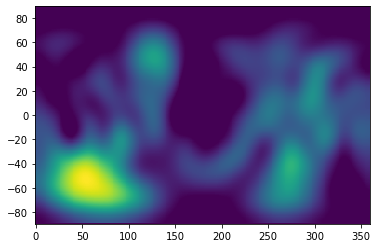

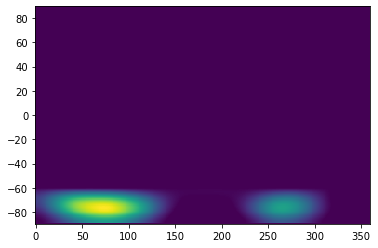

In [101]:
# Check that the right area is capped.

field2plot = ds_or.orog[0][0].values
newfield2plot = np.flipud(hc[:,np.newaxis])*field2plot

plt.pcolormesh(slon,slat,field2plot,shading='nearest')
plt.show()
plt.pcolormesh(slon,slat,field2plot-newfield2plot,shading='nearest')
plt.show()

----------------------------------------------------
flament-et-al-2013_1d


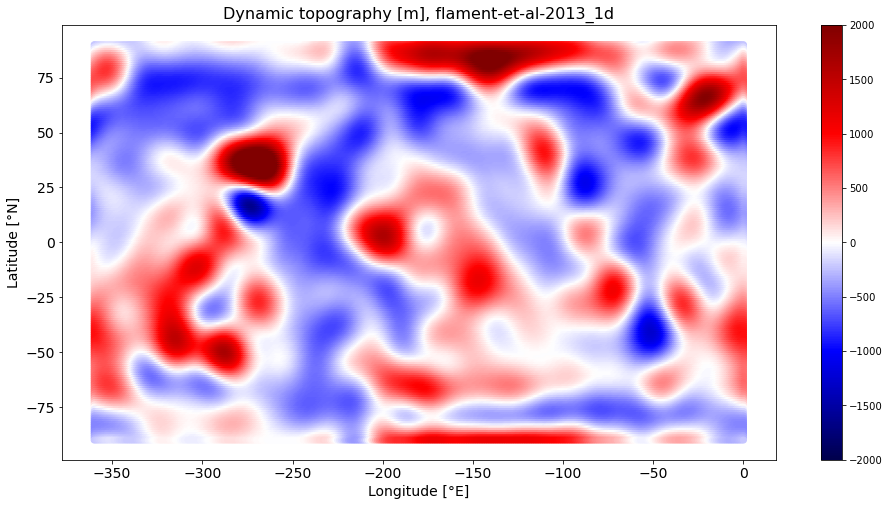

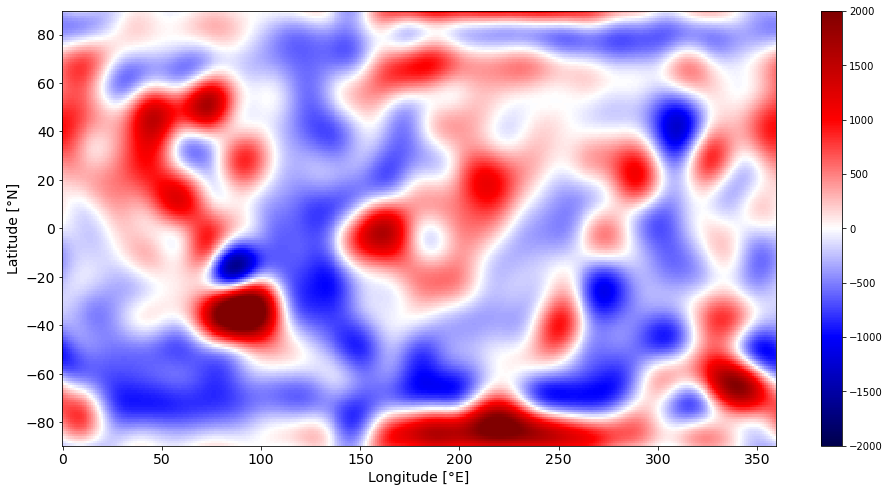

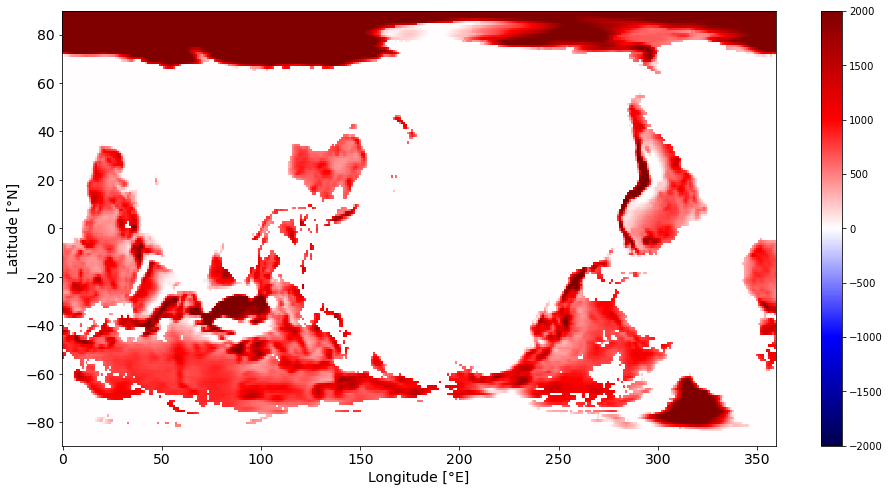

----------------------------------------------------
kaban-et-al-2003


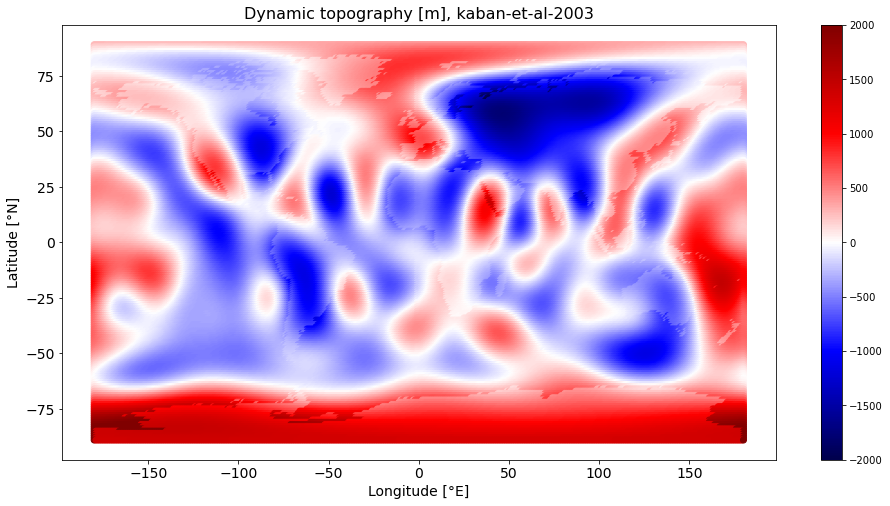

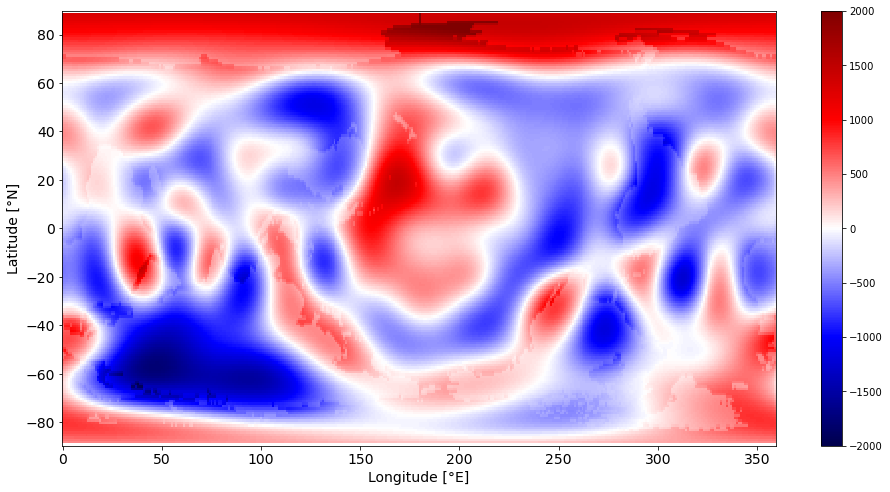

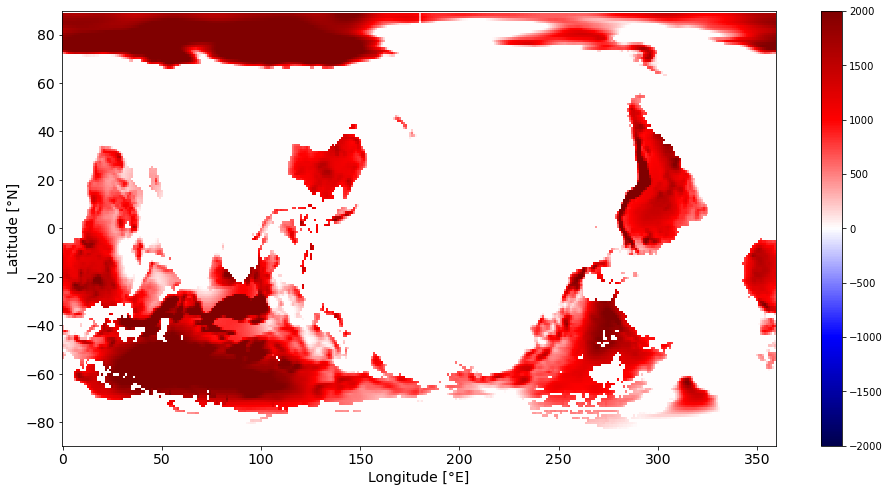

----------------------------------------------------
panasyuk-hager-2000


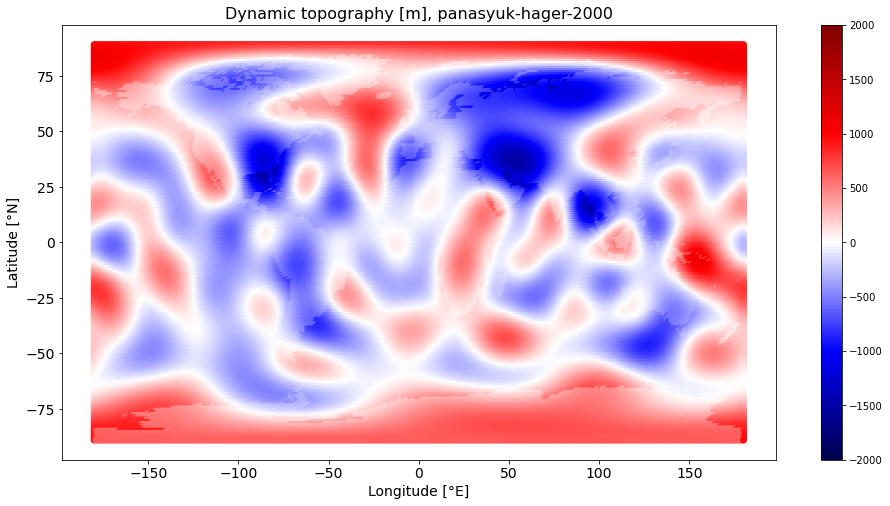

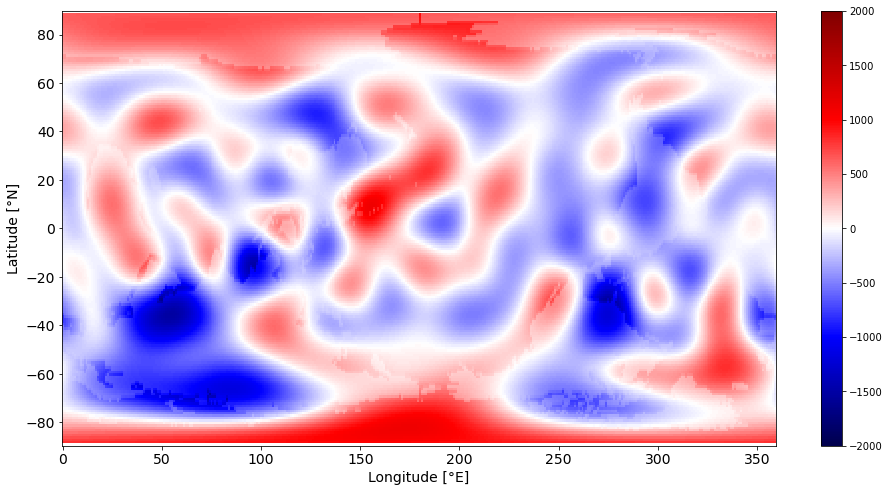

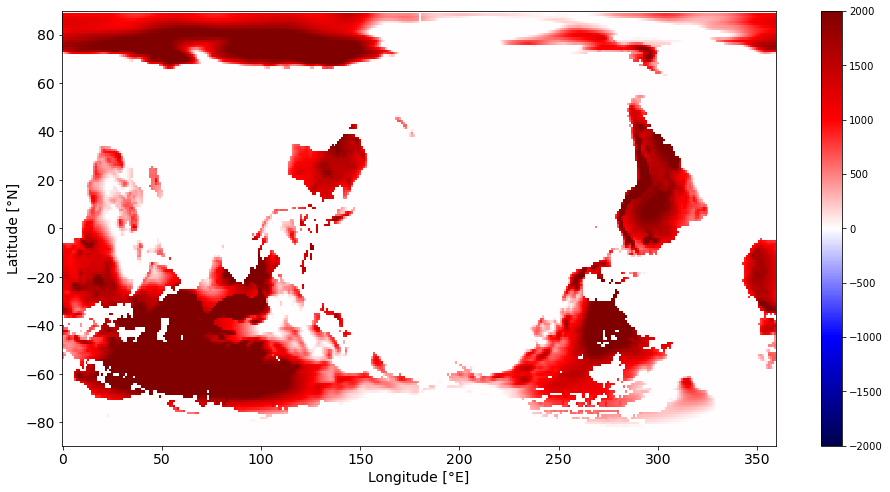

----------------------------------------------------
steinberger-2007


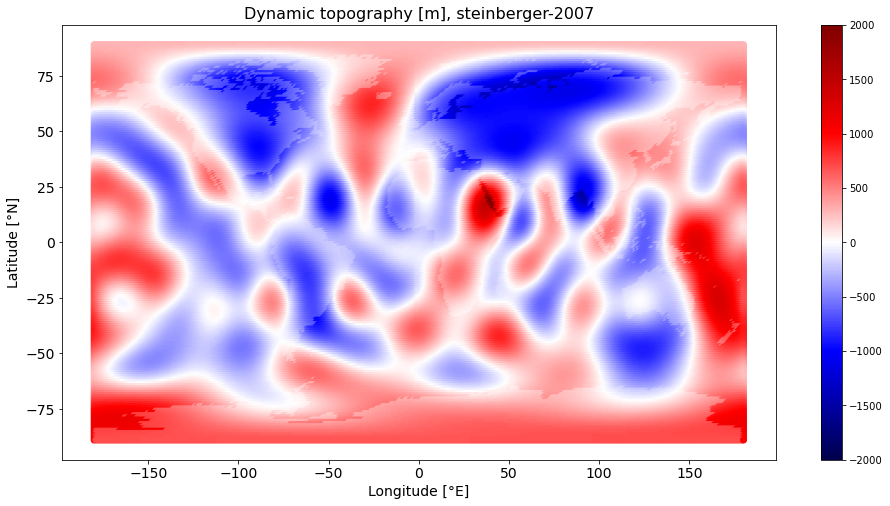

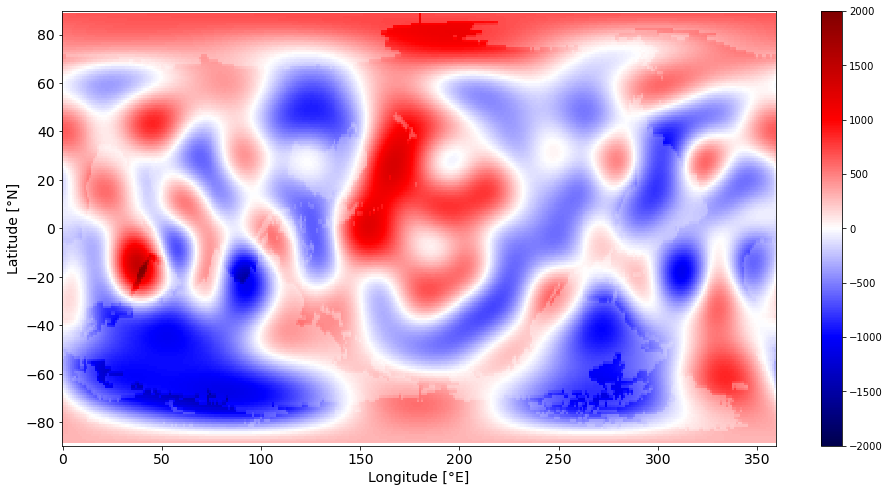

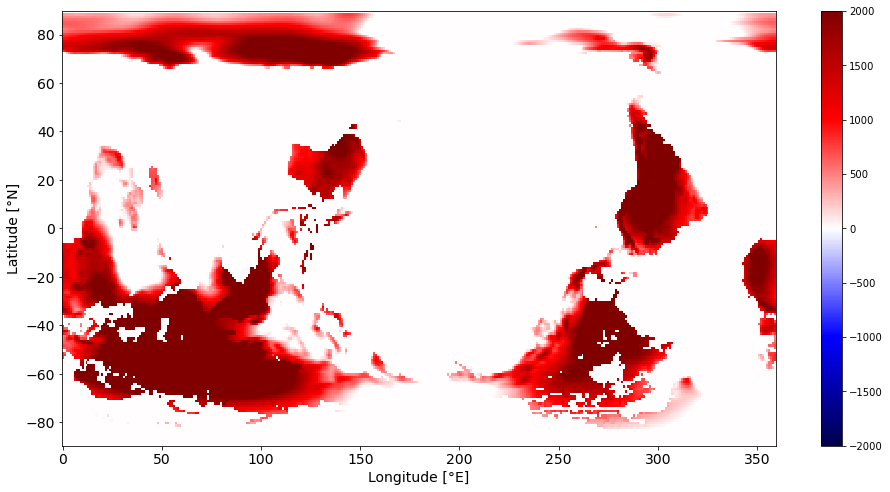

"    \n    # These filters do not change much: the simulations do not run anyway!\n    \n    # Filter the final orography with a gaussian filter of 10 degrees.\n    lpor_modif_or = nan_gaussian_filter(modif_or.values,10)\n    ds_or['orog'] = modif_or-modif_or.values+lpor_modif_or # this is to inherit the structure of the dataset.\n\n    ds_or.fillna(-999)\n    ds_or.to_netcdf('aclim_era5_sfc_1981_2010_lpor_'+name+'.nc')\n    \n    # Filter the interpolated dynamic topography with a gaussian filter of 5 degrees.\n    lp_interp_dyn_top = nan_gaussian_filter(interp_dyn_top,5) # we filter with a sigma of 5 degrees\n    lp_modif_or = ds_or.orog - lp_interp_dyn_top # [m]\n    lp_modif_or = xr.where(lp_modif_or>0,lp_modif_or.values,0)\n    ds_or['orog'] = lp_modif_or\n\n    ds_or.fillna(-999)\n    ds_or.to_netcdf('aclim_era5_sfc_1981_2010_lp_'+name+'.nc')\n\n"

In [102]:
# Now read the files in the folder various_models
model_names = ['flament-et-al-2013_1d','kaban-et-al-2003','panasyuk-hager-2000','steinberger-2007']

# Read the SPEEDY orography file and create the grid to interpolate.
orogr_filename = 'aclim_era5_sfc_1981_2010.nc'
ds_or = xr.open_dataset(orogr_filename)
slon = ds_or.lon.values
slat = ds_or.lat.values
grid_x, grid_y = np.meshgrid(slon,slat)
lsm = ds_or['lsm'][0][0].values

for name in model_names:
    print('----------------------------------------------------')
    print(name)

    filename = name+'.xyz'
    df = pd.read_csv('./various_models/'+filename,sep='\t')
    
    # Plot the map
    fig = plt.figure(figsize=(16,8))
    sc = plt.scatter(df.lon,df.lat,c=df.res_top,cmap='seismic',vmin=-2000,vmax=2000)
    plt.colorbar(sc)
    plt.ylabel('Latitude [°N]',fontsize=14)
    plt.xlabel('Longitude [°E]',fontsize=14)
    plt.tick_params(axis='both',labelsize=14)
    plt.title('Dynamic topography [m], '+name,fontsize=16)
    
    plt.savefig('dyn_top_map_'+name+'.png')
    plt.show()
    
    # Interpolate on SPEEDY grid
    lon360 = df.lon.copy()
    lon360[df.lon<0] = df.lon+360

    a_interp_dyn_top = griddata((lon360,df.lat),df.res_top,(grid_x, grid_y), method='linear')
    interp_dyn_top = np.flipud(a_interp_dyn_top) # This is to flip upside down the field.

    fig = plt.figure(figsize=(16,8))
    sc = plt.pcolormesh(grid_x,grid_y,interp_dyn_top,cmap='seismic',vmin=-2000,vmax=2000,shading='nearest')
    plt.colorbar(sc)
    plt.ylabel('Latitude [°N]',fontsize=14)
    plt.xlabel('Longitude [°E]',fontsize=14)
    plt.tick_params(axis='both',labelsize=14)
    #plt.title('Dynamic topography [km]',fontsize=16)
    plt.show()
    
    # Take the difference between the SPEEDY orography and the dynamic component.
    modif_or = ds_or.orog - interp_dyn_top # [m]
    
    # Replace the orography with the modified ororgaphy in the dataset and save it to a new netcdf file.
    modif_or = xr.where(modif_or>0,modif_or.values,0)
    ds_or['orog'] = modif_or

    ds_or.fillna(-999)
    ds_or.to_netcdf('aclim_era5_sfc_1981_2010_'+name+'.nc')

    fig = plt.figure(figsize=(16,8))
    sc = plt.pcolormesh(grid_x,grid_y,lsm*modif_or[0][0].values,cmap='seismic',vmin=-2000,vmax=2000,shading='nearest')
    plt.colorbar(sc)
    plt.ylabel('Latitude [°N]',fontsize=14)
    plt.xlabel('Longitude [°E]',fontsize=14)
    plt.tick_params(axis='both',labelsize=14)
    plt.show()

    # Define a new version of the files where the orography is capped above lat 60°N with the function hc.
    
    ds_or['orog'] = np.flipud(hc[:,np.newaxis])*modif_or

    ds_or.fillna(-999)
    ds_or.to_netcdf('aclim_era5_sfc_1981_2010_hc_'+name+'.nc')

    
    
"""    
    # These filters do not change much: the simulations do not run anyway!
    
    # Filter the final orography with a gaussian filter of 10 degrees.
    lpor_modif_or = nan_gaussian_filter(modif_or.values,10)
    ds_or['orog'] = modif_or-modif_or.values+lpor_modif_or # this is to inherit the structure of the dataset.

    ds_or.fillna(-999)
    ds_or.to_netcdf('aclim_era5_sfc_1981_2010_lpor_'+name+'.nc')
    
    # Filter the interpolated dynamic topography with a gaussian filter of 5 degrees.
    lp_interp_dyn_top = nan_gaussian_filter(interp_dyn_top,5) # we filter with a sigma of 5 degrees
    lp_modif_or = ds_or.orog - lp_interp_dyn_top # [m]
    lp_modif_or = xr.where(lp_modif_or>0,lp_modif_or.values,0)
    ds_or['orog'] = lp_modif_or

    ds_or.fillna(-999)
    ds_or.to_netcdf('aclim_era5_sfc_1981_2010_lp_'+name+'.nc')

"""

In [ ]:
ds_or.orog.plot()

In [103]:
ds_speedy = xr.open_dataset('aclim_era5_sfc_1981_2010.nc')
ds_dav = xr.open_dataset('aclim_era5_sfc_1981_2010_modified_orography.nc')
ds_fla = xr.open_dataset('aclim_era5_sfc_1981_2010_flament-et-al-2013_1d.nc')
ds_kab = xr.open_dataset('aclim_era5_sfc_1981_2010_kaban-et-al-2003.nc')
ds_pan = xr.open_dataset('aclim_era5_sfc_1981_2010_panasyuk-hager-2000.nc') # ***
ds_pan_hc = xr.open_dataset('aclim_era5_sfc_1981_2010_hc_panasyuk-hager-2000.nc') # ***
ds_ste = xr.open_dataset('aclim_era5_sfc_1981_2010_steinberger-2007.nc') # ***



lsm = ds_speedy.lsm[0][0].values

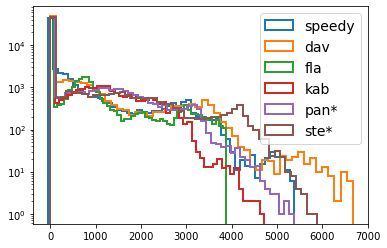

In [104]:
y_speedy = ds_speedy.orog.values*lsm
y_dav = ds_dav.orog.values*lsm
y_fla = ds_fla.orog.values*lsm
y_kab = ds_kab.orog.values*lsm
y_pan = ds_pan.orog.values*lsm
y_pan_hc = ds_pan_hc.orog.values*lsm
y_ste = ds_ste.orog.values*lsm

plt.hist(y_speedy.flatten(),bins=50,label='speedy',histtype='step',linewidth=2)
plt.hist(y_dav.flatten(),bins=50,label='dav',histtype='step',linewidth=2)
plt.hist(y_fla.flatten(),bins=50,label='fla',histtype='step',linewidth=2)
plt.hist(y_kab.flatten(),bins=50,label='kab',histtype='step',linewidth=2)
plt.hist(y_pan.flatten(),bins=50,label='pan*',histtype='step',linewidth=2)
plt.hist(y_ste.flatten(),bins=50,label='ste*',histtype='step',linewidth=2)
plt.yscale('log')

plt.legend(fontsize=14)

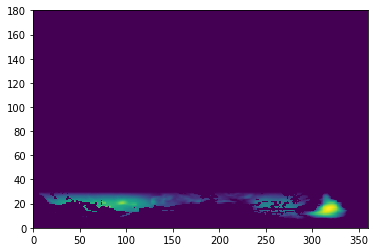

In [106]:
plt.pcolormesh(y_pan[0][0]-y_pan_hc[0][0])

In [54]:
def grad_sphere(field, llon, llat):
    """
    Function to calculate the gradient of a 2D scalar field over a sphere, given the coordinates in degrees on 
    the same 2D grid. The derivatives are taken as second-order differences in the interior, and first-order 
    (forward or backward) on the edges.
    """
    R = 6371.0e3 # Earth radius in m.
    
    field = np.double(field)
    llon = np.double(llon)
    llat = np.double(llat)
    
    costheta = np.cos(llat*np.pi/180)
    
    df_dx = field-field
    df_dx[:,1:-1] = (field[:,2:]-field[:,:-2])/(R*costheta[:,1:-1]*(llon[:,2:]-llon[:,:-2])*np.pi/180)
    df_dx[:,0] = (field[:,1]-field[:,0])/(R*costheta[:,0]*(llon[:,1]-llon[:,0])*np.pi/180)
    df_dx[:,-1] = (field[:,-1]-field[:,-2])/(R*costheta[:,-1]*(llon[:,-1]-llon[:,-2])*np.pi/180)
    
    df_dy = field-field
    df_dy[1:-1,:] = (field[2:,:]-field[:-2,:])/(R*(llat[2:,:]-llat[:-2,:])*np.pi/180)
    df_dy[0,:] = (field[1,:]-field[0,:])/(R*(llat[1,:]-llat[0,:])*np.pi/180)
    df_dy[-1,:] = (field[-1,:]-field[-2,:])/(R*(llat[-1,:]-llat[-2,:])*np.pi/180)
    
    return df_dx, df_dy

<ipython-input-55-8b00b06e4ec4>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(llon,llat,np.sqrt(df_dx**2+df_dy**2))


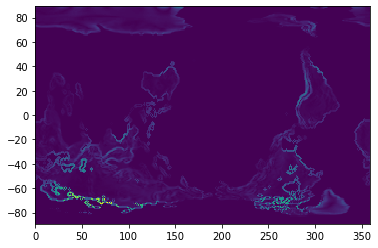

In [55]:
lon = ds_speedy.lon.values
lat = ds_speedy.lat.values
llon,llat=np.meshgrid(lon,lat)

df_dx,df_dy = grad_sphere(y_ste[0,0],llon,llat)
plt.pcolormesh(llon,llat,np.sqrt(df_dx**2+df_dy**2))

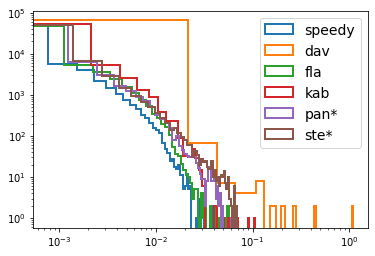

In [59]:
# Now the orography is multiplied by the land sea mask to include the discontinuity along the coastlines.
df_dx,df_dy = grad_sphere(y_speedy[0,0],llon,llat)
field_speedy = np.sqrt(df_dx**2+df_dy**2)
plt.hist(field_speedy.flatten(),bins=50,label='speedy',histtype='step',linewidth=2)
df_dx,df_dy = grad_sphere(y_dav[0,0],llon,llat)
field_dav = np.sqrt(df_dx**2+df_dy**2)
plt.hist(field_dav.flatten(),bins=50,label='dav',histtype='step',linewidth=2)
df_dx,df_dy = grad_sphere(y_fla[0,0],llon,llat)
field_fla = np.sqrt(df_dx**2+df_dy**2)
plt.hist(field_fla.flatten(),bins=50,label='fla',histtype='step',linewidth=2)
df_dx,df_dy = grad_sphere(y_kab[0,0],llon,llat)
field_kab = np.sqrt(df_dx**2+df_dy**2)
plt.hist(field_kab.flatten(),bins=50,label='kab',histtype='step',linewidth=2)
df_dx,df_dy = grad_sphere(y_pan[0,0],llon,llat)
field_pan = np.sqrt(df_dx**2+df_dy**2)
plt.hist(field_pan.flatten(),bins=50,label='pan*',histtype='step',linewidth=2)
df_dx,df_dy = grad_sphere(y_ste[0,0],llon,llat)
field_ste = np.sqrt(df_dx**2+df_dy**2)
plt.hist(field_ste.flatten(),bins=50,label='ste*',histtype='step',linewidth=2)
plt.yscale('log')
plt.xscale('log')

plt.legend(fontsize=14)

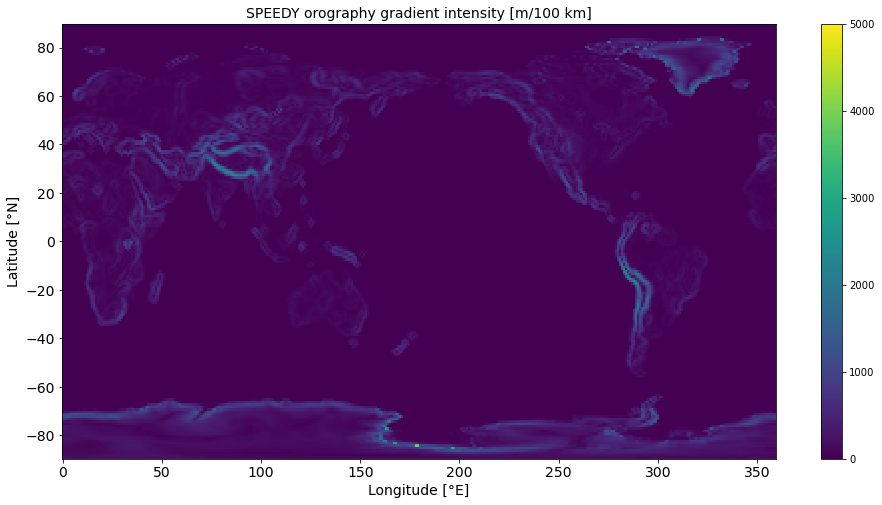

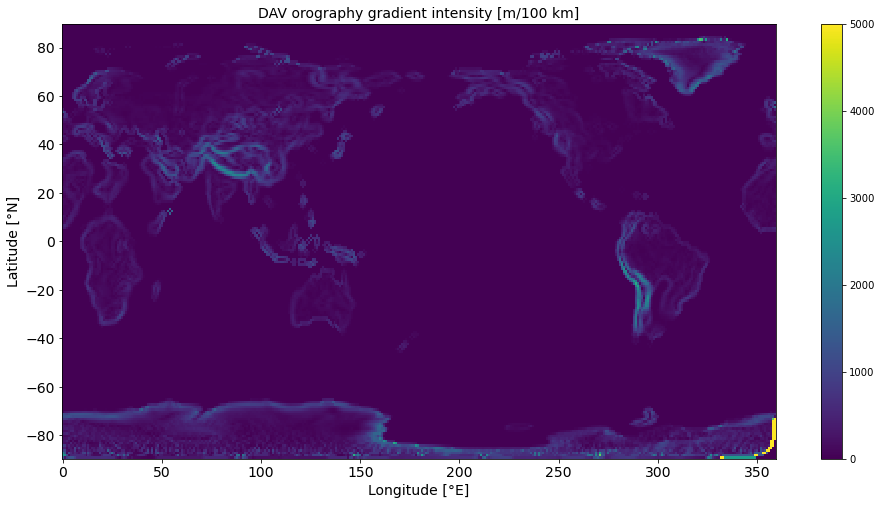

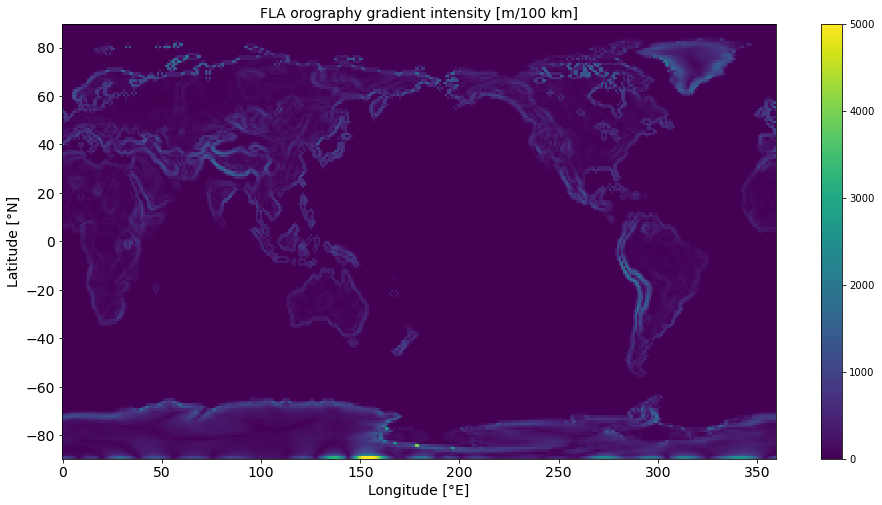

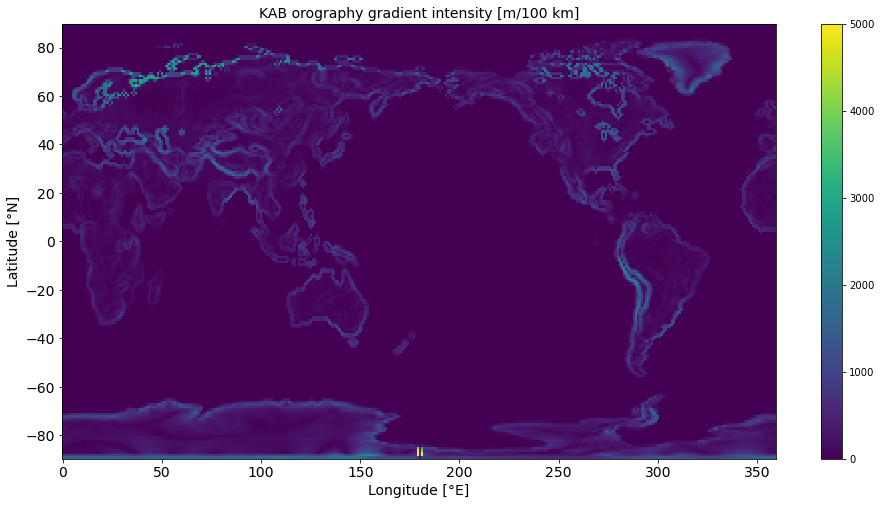

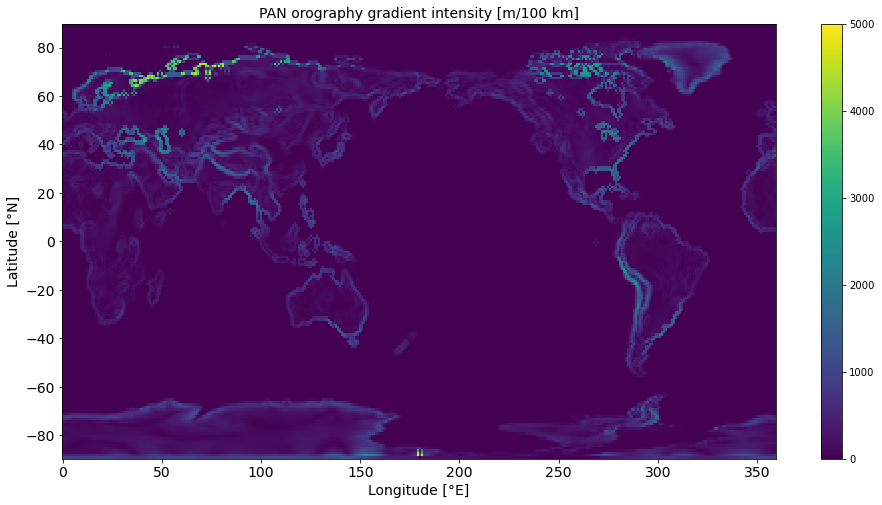

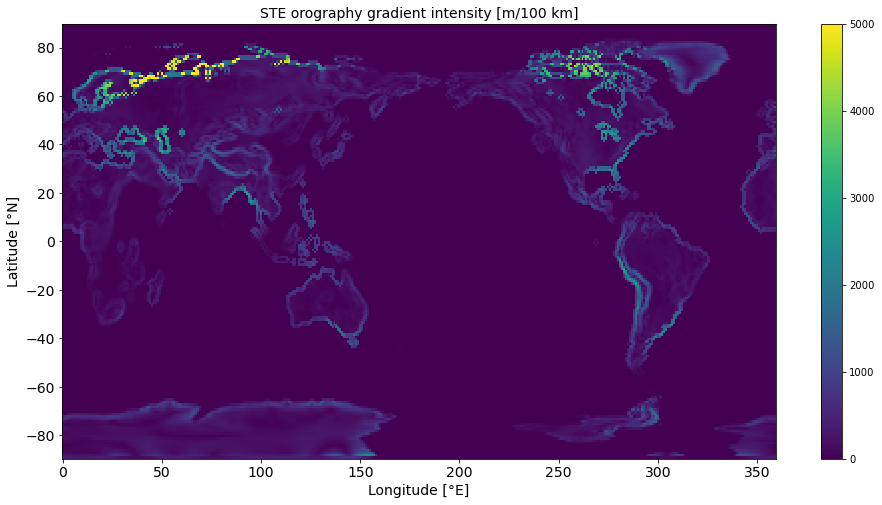

In [77]:
# Check the gradients with the land-sea mask!

vmin=0
vmax=0.05*1e5


fig = plt.figure(figsize=(16,8))
pc = plt.pcolormesh(llon,llat,np.flipud(field_speedy)*1e5,vmin=vmin,vmax=vmax,shading='nearest')
plt.colorbar(pc)
plt.ylabel('Latitude [°N]',fontsize=14)
plt.xlabel('Longitude [°E]',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.title('SPEEDY orography gradient intensity [m/100 km]',fontsize=14)
plt.savefig('orography_gradient_intenstity_speedy.png')
plt.show()

fig = plt.figure(figsize=(16,8))
pc = plt.pcolormesh(llon,llat,np.flipud(field_dav)*1e5,vmin=vmin,vmax=vmax,shading='nearest')
plt.colorbar(pc)
plt.ylabel('Latitude [°N]',fontsize=14)
plt.xlabel('Longitude [°E]',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.title('DAV orography gradient intensity [m/100 km]',fontsize=14)
plt.savefig('orography_gradient_intenstity_dav.png')
plt.show()

fig = plt.figure(figsize=(16,8))
pc = plt.pcolormesh(llon,llat,np.flipud(field_fla)*1e5,vmin=vmin,vmax=vmax,shading='nearest')
plt.colorbar(pc)
plt.ylabel('Latitude [°N]',fontsize=14)
plt.xlabel('Longitude [°E]',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.title('FLA orography gradient intensity [m/100 km]',fontsize=14)
plt.savefig('orography_gradient_intenstity_fla.png')
plt.show()

fig = plt.figure(figsize=(16,8))
pc = plt.pcolormesh(llon,llat,np.flipud(field_kab)*1e5,vmin=vmin,vmax=vmax,shading='nearest')
plt.colorbar(pc)
plt.ylabel('Latitude [°N]',fontsize=14)
plt.xlabel('Longitude [°E]',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.title('KAB orography gradient intensity [m/100 km]',fontsize=14)
plt.savefig('orography_gradient_intenstity_kab.png')
plt.show()

fig = plt.figure(figsize=(16,8))
pc = plt.pcolormesh(llon,llat,np.flipud(field_pan)*1e5,vmin=vmin,vmax=vmax,shading='nearest')
plt.colorbar(pc)
plt.ylabel('Latitude [°N]',fontsize=14)
plt.xlabel('Longitude [°E]',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.title('PAN orography gradient intensity [m/100 km]',fontsize=14)
plt.savefig('orography_gradient_intenstity_pan.png')
plt.show()

fig = plt.figure(figsize=(16,8))
pc = plt.pcolormesh(llon,llat,np.flipud(field_ste)*1e5,vmin=vmin,vmax=vmax,shading='nearest')
plt.colorbar(pc)
plt.ylabel('Latitude [°N]',fontsize=14)
plt.xlabel('Longitude [°E]',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.title('STE orography gradient intensity [m/100 km]',fontsize=14)
plt.savefig('orography_gradient_intenstity_ste.png')
plt.show()